
In this problem because we don't know the feature's meaning and what they refer I impute all for feature colomn with it's own median. It is more convinient than imputing with mean. 




In [1]:
import pandas as pd
import matplotlib as plt

df = pd.read_csv('dataset.csv')

df['feature_1'] = df['feature_1'].fillna(df['feature_1'].median())
df['feature_2'] = df['feature_2'].fillna(df['feature_2'].median())
df['feature_3'] = df['feature_3'].fillna(df['feature_3'].median())
df['feature_4'] = df['feature_4'].fillna(df['feature_4'].median())




Lets see the histograms for observing distributions of the features. Let's are there any skewed sturctures and which distribution features are pointing

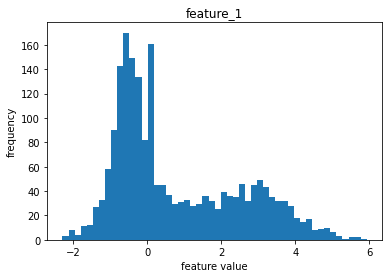

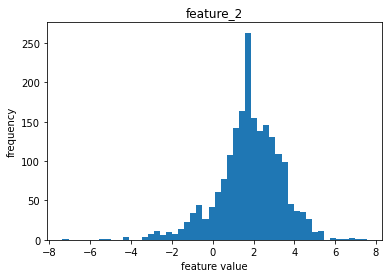

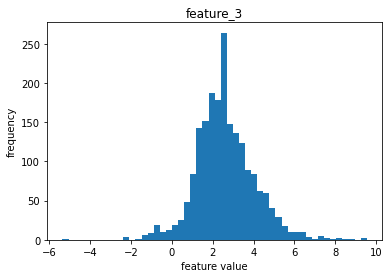

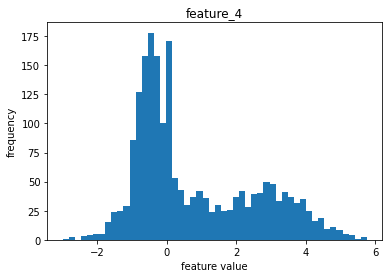

In [2]:
import matplotlib.pyplot as plt
for col in df.columns[:4]:
    plt.figure()
    plt.hist(df[col].dropna(), bins=50)
    plt.title(f'{col}')
    plt.xlabel('feature value')
    plt.ylabel('frequency')
    plt.show()

As we can see Feature 1 and Feature 4 have skewed graph and also Feature 2 has partially skewed graph. Let's check the correlation between features for deciding are there any feature that we are going to drop 

In [3]:
print(df[['feature_1', 'feature_2', 'feature_3', 'feature_4']].corr())

           feature_1  feature_2  feature_3  feature_4
feature_1   1.000000   0.405881   0.122808   0.735658
feature_2   0.405881   1.000000   0.137357   0.409338
feature_3   0.122808   0.137357   1.000000   0.119408
feature_4   0.735658   0.409338   0.119408   1.000000


After the estimating correlations we observed that there is a correlation between Feature 1 and 4 but if I drop one of them we will lose %25 of the data and due to this %25 loss I ignored this correlations.

Because our data set is imbalanced it is more convinient to use strasify for spliting. I divided our data %80 for training and %20 for testing 

In [4]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :4]  
y = df.iloc[:, 4]   

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

Because there aren't huge gaps between features value's ranges maybe no need to scale it. But for being in more safe side I scaled all our data. Before I scaled it I observed little bit lower accuracy values after scaling accuracy of tests increased.

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test= scaler.fit_transform(X_test)

Before choosing models I create a dictionaries for putting accuracy of our models and and how much time that take.

In [69]:
Model_dic={}
Model_time={}

Because this is supervised clasification problem and my data is imbalanced it is more convinient to use classification algoritihms. After all my observations I chose Decision Tree, Random Forests, Support Vector and Gradient Boost as models. 

In [70]:
import time

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
start_time = time.time()

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
end_time = time.time()

accuracy = dtc.score(X_test, y_test)
Model_dic["DecisionTreeClassifier"]= accuracy
Model_time["DecisionTreeClassifier"]= end_time-start_time
print(f"Accuracy: {accuracy}")

Accuracy: 0.82


In [71]:
from sklearn.ensemble import RandomForestClassifier
import time
from sklearn.metrics import accuracy_score

rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=120, random_state=42)
start_time = time.time()
rf_classifier.fit(X_train, y_train)
end_time = time.time()
score = rf_classifier.score(X_test, y_test)
Model_dic["RandomForestClassifier"]= score
Model_time["RandomForestClassifier"]= end_time-start_time
print("Accuracy:", score)


Accuracy: 0.885


I think that there is no need to use a computationally expensive method such as grid search, as it seems sufficient to be able to predict the already small number of viruses with a hit rate of 88.5%. I did manuel hyperparameter tunning and found this max depth and n_estimators as optimal parameter value.

In [72]:
import time
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
start_time = time.time()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
end_time = time.time()
accuracy = accuracy_score(y_test, y_pred)
Model_dic["GradientBoostingClassifier"]= accuracy
Model_time["GradientBoostingClassifier"]= end_time-start_time
print("accuracy:", accuracy)

accuracy: 0.8575


In [73]:
import time
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
start_time = time.time()
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
end_time = time.time()
accuracy = accuracy_score(y_test, y_pred)
Model_dic["SupportVector"]= accuracy
Model_time["SupportVector"]= end_time-start_time
print("Accuracy:", accuracy)

Accuracy: 0.66


<function matplotlib.pyplot.show(close=None, block=None)>

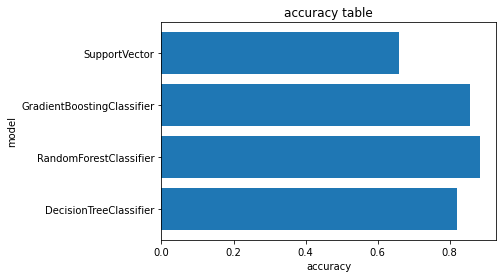

In [74]:
import matplotlib.pyplot as plt





Model_dic = list(Model_dic.items())



plt.barh([x[0] for x in Model_dic], [x[1] for x in Model_dic])
plt.title('accuracy table')
plt.xlabel('accuracy')
plt.ylabel('model')
plt.show


Here it is the Accuray table. We can see that most accurate model is Random Forest model for our problem.

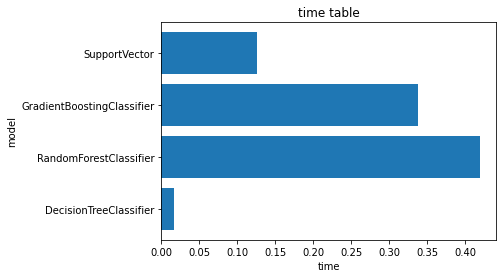

In [75]:
import matplotlib.pyplot as plt

Model_time = list(Model_time.items())

plt.barh([x[0] for x in Model_time], [x[1] for x in Model_time])

plt.title('time table')
plt.xlabel('time')
plt.ylabel('model')
plt.show()

Here it is our Time table. This shows which model computed in how much time. As we can see Random Forest take the biggest time for computing. 